## Diffraction Efficiency vs. Acoustic Power

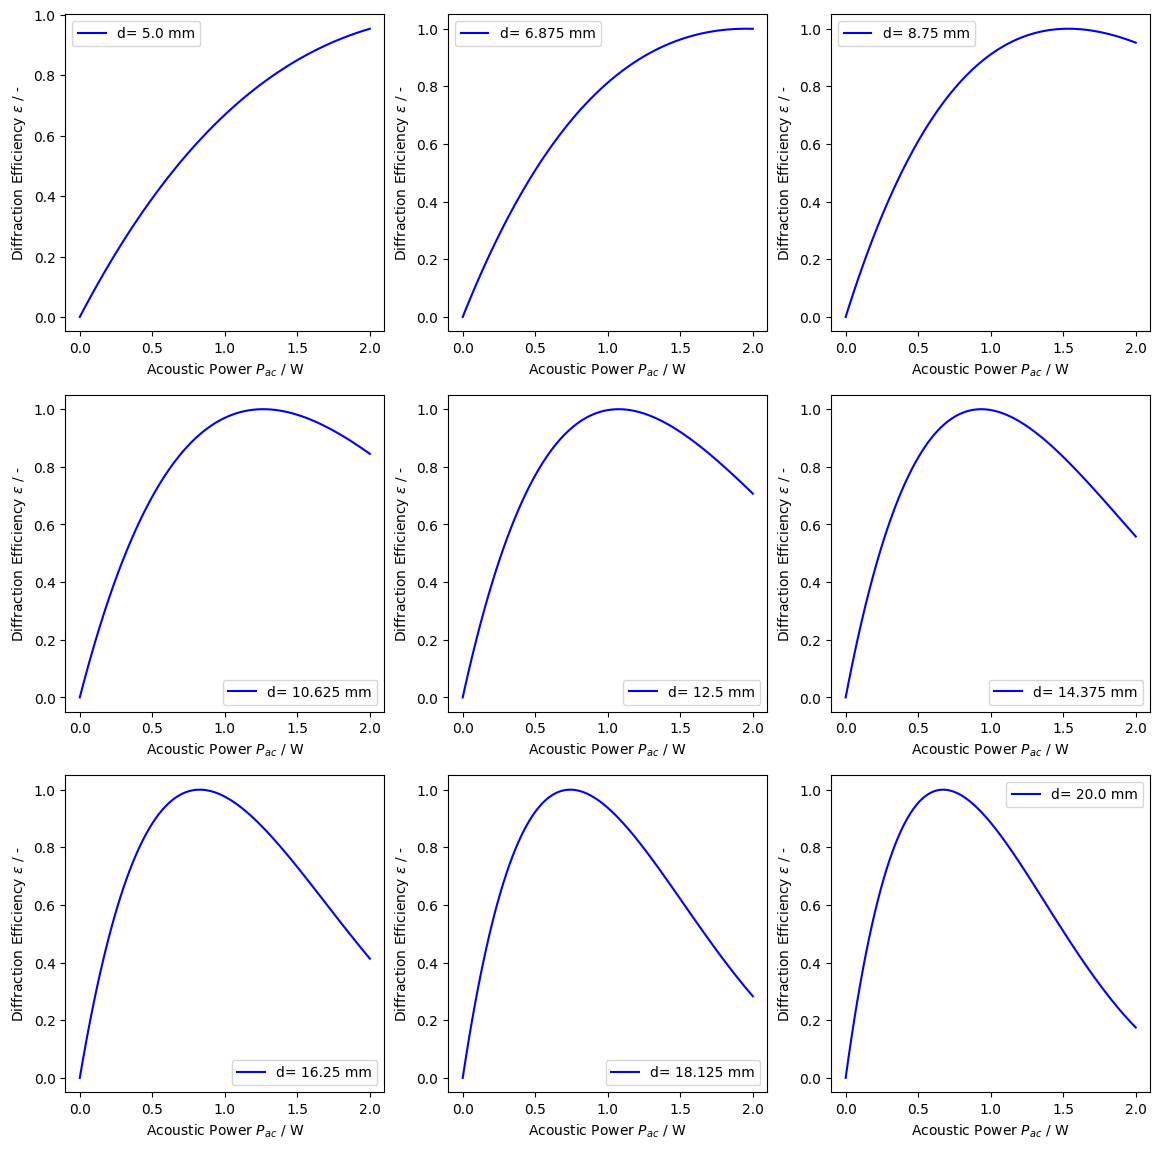

In [118]:
import numpy as np
import matplotlib.pyplot as plt
#defining constants
lambda_0=633e-9 #633nm in m
M_SiO2 = 1.67*1e-14 #m^2/W
h=1e-3 #2mm height
d=np.linspace(5, 20, 9)*1e-3 #from 1 to 8 mm interaction length
k=1.12 #typical transducer conversion loss
P_s1=k*lambda_0**2*h/2/M_SiO2
P_ac=np.linspace(0, 2, 100) #from 0 to 1 Watt

qbeta=2*np.pi*lambda_0**2*d[3]**2*(80e6)**3/1.9**2/1e6/(3.1e3)**3

def eff_precise(d, P):
    P_saturation = P_s1/d
    return (np.sin(np.pi / 2 * (P/P_saturation)**0.5))**2

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
for i in range(3):
    for j in range(3):
        ax[i][j].plot(P_ac, eff_precise(d[i*3+j], P_ac), color="blue", label=("d= " + str(1000*d[i*3+j]) + " mm"))
        ax[i][j].set_xlabel(r"Acoustic Power $P_{ac}$ / W")
        ax[i][j].set_ylabel(r"Diffraction Efficiency $\varepsilon$ / -")
        ax[i][j].legend()
plt.savefig("diff_eff_diff_int_length.png", dpi=300)
plt.show()
#plt.plot(P_ac, eff_precise(d[3], P_ac))

## Bragg Angle Calculation

$\theta_B = \sin^{-1}{(\frac{\lambda}{2\Lambda})} \approx (\frac{\lambda}{2\Lambda})$

$\Omega/2\pi = \nu_s = v_s/\Lambda$

From https://www.rp-photonics.com/acousto_optic_modulators.html:

$v_{s, SiO2} = 5970$ and 
$v_{s, TeO2} = 4200$ #m/s

The piezo transducer excites a sound wave with a frequency of the order of 100 MHz and with an acoustic wavelength which is typically between 10 μm and 100 μm and an acoustic power e.g. of the order of 1 W to 10 W.

In [123]:
#function for getting wavelength differences using finite differences
import numpy as np
lambda_light = np.linspace(3, 10, 40)*1e-9 #m
v_s = np.array([5970, 4200]) #m/s
nu_acoustic = 100*1e6 #MHz
def angle_diff(n):
    lambda_acoustic = np.array(v_s[n]/nu_acoustic)
    bragg = np.arcsin(lambda_light/2/lambda_acoustic)
    array = []
    for i in range(len(bragg)-1):
        array.append((bragg[i+1]-bragg[i]))
    return np.array(array)

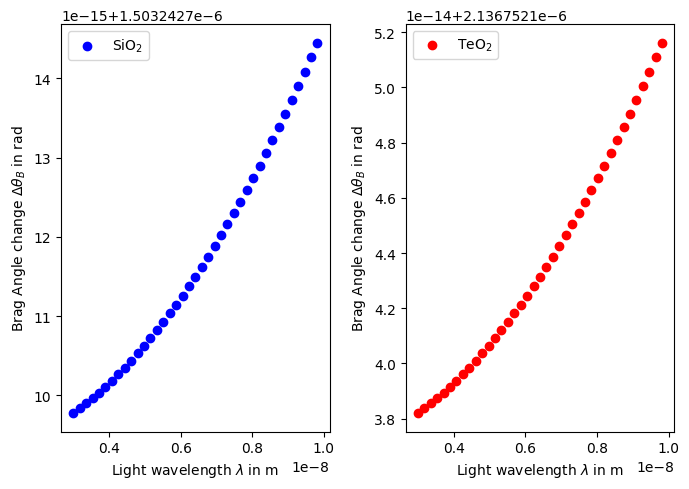

In [124]:
import numpy as np
import matplotlib.pyplot as plt


#SiO2 graphs
fig, ax = plt.subplots(1, 2, figsize=(7, 5))

angle_delta = angle_diff(0)
ax[0].scatter(lambda_light[:-1], angle_delta, color="blue", label = r"SiO$_2$")
ax[0].set_xlabel(r"Light wavelength $\lambda$ in m")
ax[0].set_ylabel(r"Brag Angle change $\Delta \theta_B$ in rad")
ax[0].legend()

ax[1].scatter(lambda_light[:-1], angle_diff(1), color="red", label = r"TeO$_2$")
ax[1].set_xlabel(r"Light wavelength $\lambda$ in m")
ax[1].set_ylabel(r"Brag Angle change $\Delta \theta_B$ in rad")
ax[1].legend()

plt.tight_layout()
plt.savefig("Bragg_differences.png", dpi=300)
plt.show()

In [125]:
angle_diff(0).max()

np.float64(1.503242714450984e-06)

## Propagation of an acoustic wave across the focus of an optical wave

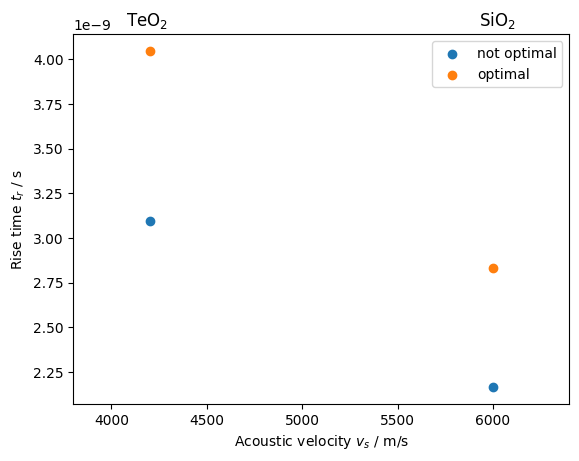

In [20]:
waist1=10*1e-6 #10um
v_sio2=6e3 #m/s
v_teo2=4.2e3 #m/s
import matplotlib.pyplot as plt
#inputs: w waist and v valocity of sound in a material
#outputs: not optimal tr_not_opt and optimal rise time tr_opt
def rise_time(w, v):
    return (1.3*w/v, 1.7*w/v)

#plot for two materials with same beam waist, rise time (y) for sound velocity (x)
plt.scatter([v_sio2, v_teo2], [rise_time(waist1, v_sio2)[0], rise_time(waist1, v_teo2)[0]], label="not optimal")
plt.scatter([v_sio2, v_teo2], [rise_time(waist1, v_sio2)[1], rise_time(waist1, v_teo2)[1]], label="optimal")
plt.title(r"TeO$_2$                                                           SiO$_2$")
plt.xlabel("Acoustic velocity $v_s$ / m/s")
plt.ylabel("Rise time $t_r$ / s")
plt.xlim(3800, 6400)
plt.legend()
plt.savefig("te_si_tr.png", dpi=300)
plt.show()

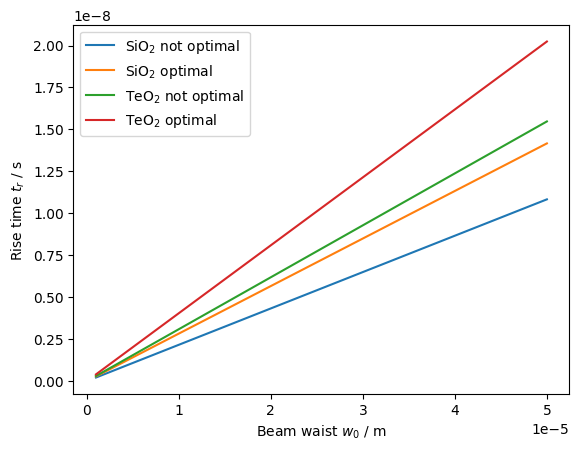

In [25]:
#plot for two materials with same beam waist
import numpy as np
waists=np.linspace(1, 50, 100)*1e-6 #waists from 1 to 100 micrometers
#switching speeds in 1/T in Hz
plt.plot(waists, rise_time(waists, v_sio2)[0], label=r"SiO$_2$ not optimal")
plt.plot(waists, rise_time(waists, v_sio2)[1], label=r"SiO$_2$ optimal")
plt.plot(waists, rise_time(waists, v_teo2)[0], label=r"TeO$_2$ not optimal")
plt.plot(waists, rise_time(waists, v_teo2)[1], label=r"TeO$_2$ optimal")
plt.xlabel("Beam waist $w_0$ / m")
plt.ylabel("Rise time $t_r$ / s")
plt.legend()
plt.savefig("different_waists_te_si.png", dpi=300)
plt.show()